In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


## VERİ SETİ İNCELEME : 
Case Type: Davanın türü (Criminal, Civil, Commercial)  
Case Duration (Days): Davanın süresi (gün olarak)  
Judge Experience (Years): Hakimin deneyim yılı  
Number of Witnesses: Tanık sayısı  
Legal Fees (USD): Hukuk masrafları (USD olarak)  
Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
Defendant's Wealth (USD): Davalının serveti  
Number of Evidence Items: Delil sayısı  
Number of Legal Precedents: İlgili hukuki emsal sayısı  
Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

## Görevler

### Veri Ön İşleme:
* Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
* Gerektiğinde eksik verileri doldurun veya çıkarın.  
* Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

### Veri Setini Ayırma:
* Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

### Model Kurulumu:
* Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

### Modeli Değerlendirme:
* Test verilerini kullanarak modelin doğruluğunu değerlendirin.
* Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

### Sonuçları Görselleştirme:
* Karar ağacının yapısını görselleştirin.
* Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

In [14]:
# Eksik değerleri kontrol etme
print("Eksik değerler:\n", data.isnull().sum())

# Özellik ve hedef değişkenleri ayırma
X = data.drop(columns=['Outcome'])  # Bağımsız değişkenler
y = data['Outcome']                 # Hedef değişken

# Kategorik değişkenleri dönüştürme (One-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Özellik ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Karar Ağacı modelini oluşturma ve eğitme
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Model tahminleri
y_pred = model.predict(X_test)

# Performans değerlendirmesi
accuracy = accuracy_score(y_test, y_pred)

print("--------Model Performansı --------")
print("--------Model Performansı --------")
print("--------Model Performansı --------")

print("Doğruluk:", accuracy)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))

Eksik değerler:
 Case Type                     0
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
dtype: int64
--------Model Performansı --------
--------Model Performansı --------
--------Model Performansı --------
Doğruluk: 1.0
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Karışıklık Matrisi:
 [[40]]


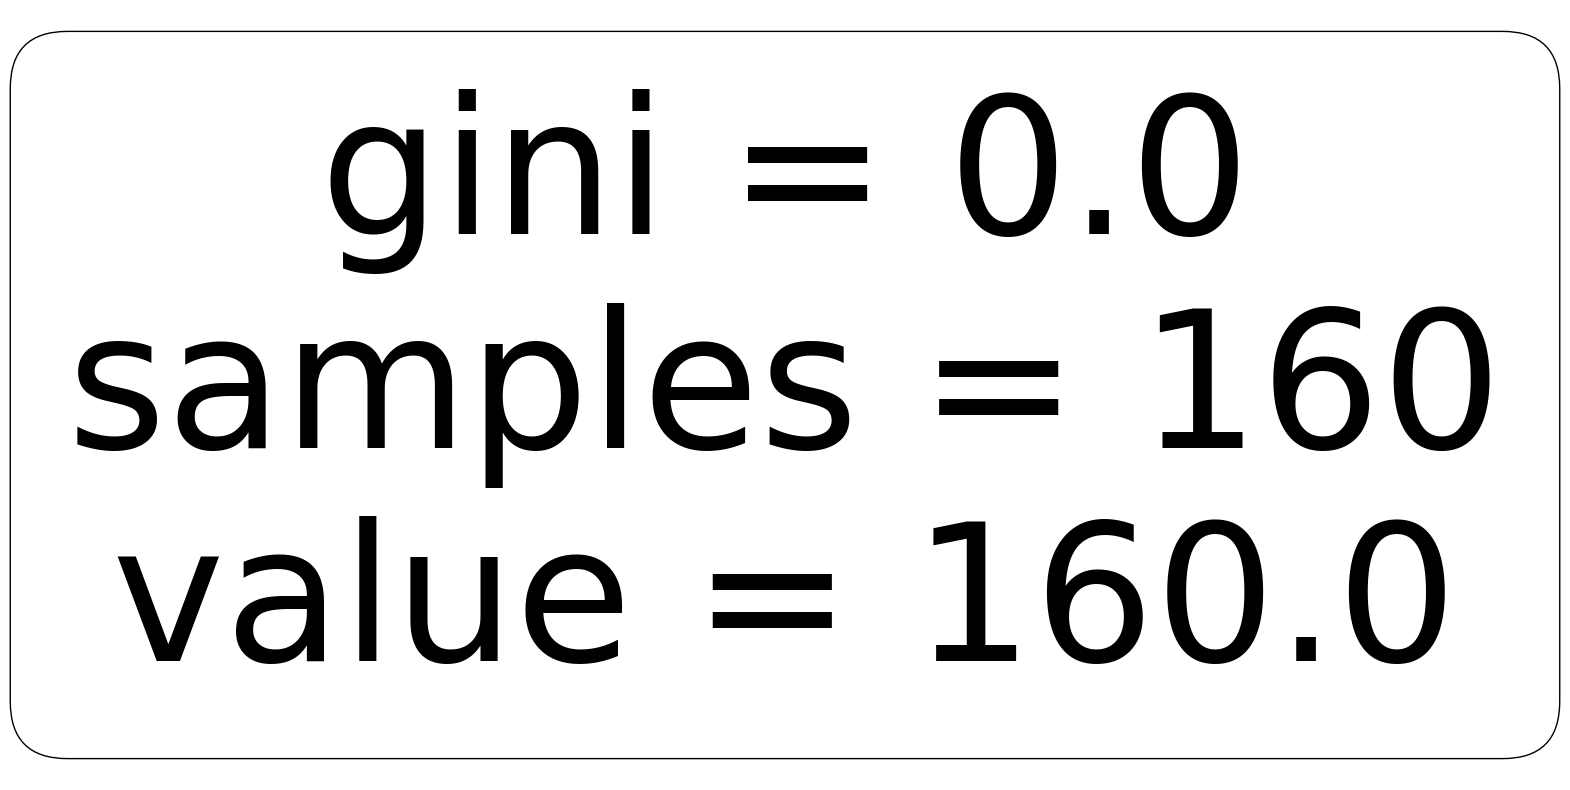

In [16]:
# Karar ağacını görselleştirme
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Kaybetmek', 'Kazanmak'], filled=True, rounded=True)
plt.show()

Karar ağacının dallanmaması, yani ağacın yalnızca tek bir düğümden oluşması durumunda, hiçbir özellik ayrım yapmak için kullanılmadığı için tüm özelliklerin önem derecesi 0 olarak hesaplanır. Bu genellikle iki durumda ortaya çıkar:

Hedef Değişkenin Tek Sınıfa Sahip Olması:
Eğer veri setinizde Outcome sütunundaki tüm değerler aynıysa (örneğin tüm örnekler "Kazanmak" veya "Kaybetmek" olarak etiketlenmişse), model hiçbir bölünmeye ihtiyaç duymaz. Böylece hiçbir özellik kullanılmaz ve önem dereceleri 0 olur.

Çok Yoğun Sınıf Dengesizliği:
Hedef değişkende çok yüksek dengesizlik varsa (örneğin %99 aynı sınıf), model bu durumu öğrenip split yapmadan doğrudan çoğunluk sınıfını tahmin edebilir. Bu durumda da özelliklerin katkısı hesaplanmadığından önem dereceleri 0 çıkar.

In [25]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Özelliklerin önem derecesi:")
for feature, importance in importances.items():
    print(f"{feature}: {importance:.4f}")

Özelliklerin önem derecesi:
Case Duration (Days): 0.0000
Judge Experience (Years): 0.0000
Number of Witnesses: 0.0000
Legal Fees (USD): 0.0000
Plaintiff's Reputation: 0.0000
Defendant's Wealth (USD): 0.0000
Number of Evidence Items: 0.0000
Number of Legal Precedents: 0.0000
Settlement Offered (USD): 0.0000
Severity: 0.0000
Case Type_Commercial: 0.0000
Case Type_Criminal: 0.0000


In [26]:
print(data['Outcome'].value_counts())

Outcome
0    200
Name: count, dtype: int64
